In [16]:
#Load data using pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
path = "./dataframes/dataset_20250401_162901.csv"
df = pd.read_csv(path)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IdCliente            1300 non-null   int64  
 1   FecNacimiento        1300 non-null   object 
 2   Sexo                 1300 non-null   object 
 3   count                1300 non-null   int64  
 4   dic_datos_consulta   1300 non-null   object 
 5   cc                   1300 non-null   int64  
 6   Cantidad_Atenciones  1300 non-null   float64
 7   IAH                  1300 non-null   float64
 8   o2 / CPAP            15 non-null     float64
 9   fecha_poli           1300 non-null   object 
 10  label_apnea          1300 non-null   float64
 11  edad_poli            1300 non-null   int64  
 12  secuencia_recortada  1300 non-null   object 
 13  vacios_poli          1300 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 142.3+ KB


In [33]:
df.head()

,IdCliente,FecNacimiento,Sexo,count,dic_datos_consulta,cc,Cantidad_Atenciones,IAH,o2 / CPAP,fecha_poli,label_apnea,edad_poli,secuencia_recortada,vacios_poli
0,1619,1931-12-06,F,97,[{'FechaConsulta': Timestamp('2014-02-11 13:18...,20133658,40.0,9.0,NaN,2015-05-26,1.0,83,[{'FechaConsulta': Timestamp('2014-02-11 13:18...,not empty
1,5256,1936-06-22,M,159,[{'FechaConsulta': Timestamp('2010-05-05 12:07...,2861216,102.0,12.0,NaN,2018-12-14,1.0,82,[{'FechaConsulta': Timestamp('2010-05-05 12:07...,not empty
2,7039,1947-03-27,F,125,[{'FechaConsulta': Timestamp('2005-11-24 12:17...,41376849,25.0,108.0,NaN,2018-07-15,1.0,71,[{'FechaConsulta': Timestamp('2005-11-24 12:17...,not empty
3,9669,1958-09-20,F,26,[{'FechaConsulta': Timestamp('2009-01-22 21:18...,26173038,13.0,6.0,NaN,2015-05-25,1.0,56,[{'FechaConsulta': Timestamp('2009-01-22 21:18...,not empty
4,10915,1973-02-22,F,60,[{'FechaConsulta': Timestamp('2006-09-06 18:57...,52559352,14.0,6.0,NaN,2014-08-15,1.0,41,[{'FechaConsulta': Timestamp('2006-09-06 18:57...,not empty


In [6]:
df["diag_predict"].describe()

count    1300.000000
mean       30.057692
std        69.634627
min         1.000000
25%         3.000000
50%        11.000000
75%        29.000000
max      1150.000000
Name: diag_predict, dtype: float64

In [7]:
df["diag_predict"].value_counts()

diag_predict
1      167
2      117
3       74
4       60
5       49
      ... 
231      1
307      1
113      1
122      1
132      1
Name: count, Length: 160, dtype: int64

In [9]:
df[df["diag_predict"] == 1].head()


,id_patient,diagnosis date,prediction window start,diag_predict,diag_total
12,21750,2005-11-11,2005-05-15,1,49
17,33210,2014-09-17,2014-03-21,1,2
18,35866,2013-05-02,2012-11-03,1,73
23,45307,2018-05-10,2017-11-11,1,1
36,69102,2018-07-31,2018-02-01,1,13


In [10]:
len(df)

1300

In [12]:
path = "./dataframes/dataset.csv"
df_2 = pd.read_csv(path)

In [14]:
df_2["label_apnea"].value_counts()

label_apnea
1.0    1027
0.0     273
Name: count, dtype: int64

In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IdCliente            1300 non-null   int64  
 1   FecNacimiento        1300 non-null   object 
 2   Sexo                 1300 non-null   object 
 3   count                1300 non-null   int64  
 4   dic_datos_consulta   1300 non-null   object 
 5   cc                   1300 non-null   int64  
 6   Cantidad_Atenciones  1300 non-null   float64
 7   IAH                  1300 non-null   float64
 8   o2 / CPAP            15 non-null     float64
 9   fecha_poli           1300 non-null   object 
 10  label_apnea          1300 non-null   float64
 11  edad_poli            1300 non-null   float64
 12  secuencia_recortada  1300 non-null   object 
 13  vacios_poli          1300 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 142.3+ KB


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparative_graphs(df, column_to_split, column_to_plot, title1, title2):
    """
    Esta función separa un DataFrame según los valores únicos de una columna y genera dos gráficos comparativos,
    mostrando los valores sobre las barras.

    Args:
        df (pd.DataFrame): El DataFrame de entrada.
        column_to_split (str): La columna según la cual se separará el DataFrame.
        column_to_plot (str): La columna que se graficará.
        title1 (str): Título del primer gráfico.
        title2 (str): Título del segundo gráfico.
    """
    # Obtener los valores únicos de la columna para dividir el DataFrame
    unique_values = df[column_to_split].unique()
    
    if len(unique_values) < 2:
        print("La columna para dividir debe tener al menos dos valores únicos.")
        return
    
    # Separar el DataFrame en dos subconjuntos
    df_1 = df[df[column_to_split] == unique_values[0]]
    df_2 = df[df[column_to_split] == unique_values[1]]
    
    # Crear los gráficos
    plt.figure(figsize=(14, 6))
    
    # Primer gráfico
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x=column_to_plot, data=df_1)
    plt.title(title1)
    plt.xlabel(column_to_plot)
    plt.ylabel("Count")
    # Agregar valores a las barras
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Segundo gráfico
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x=column_to_plot, data=df_2)
    plt.title(title2)
    plt.xlabel(column_to_plot)
    plt.ylabel("Count")
    # Agregar valores a las barras
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Mostrar los gráficos
    plt.tight_layout()
    plt.show()

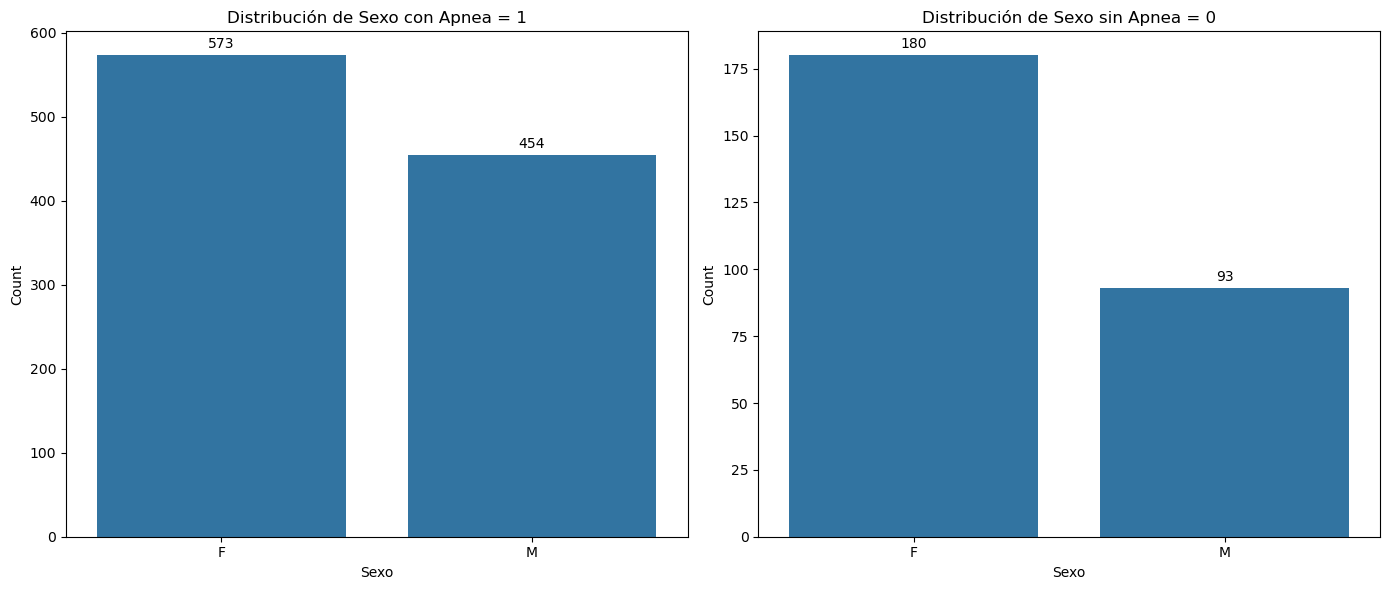

In [31]:
plot_comparative_graphs(
    df=df_2,
    column_to_split="label_apnea",
    column_to_plot="Sexo",
    title1="Distribución de Sexo con Apnea = 1",
    title2="Distribución de Sexo sin Apnea = 0"
)

In [ ]:
#TODO: Agregar el peso

In [25]:
def plot_comparative_graphs_with_bins(df, column_to_split, column_to_plot, bins, title1, title2):
    """
    Esta función separa un DataFrame según los valores únicos de una columna, agrupa los valores continuos
    en intervalos (bins) y genera dos gráficos comparativos.

    Args:
        df (pd.DataFrame): El DataFrame de entrada.
        column_to_split (str): La columna según la cual se separará el DataFrame.
        column_to_plot (str): La columna continua que se graficará.
        bins (int): Número de intervalos (bins) para agrupar los valores continuos.
        title1 (str): Título del primer gráfico.
        title2 (str): Título del segundo gráfico.
    """
    # Obtener los valores únicos de la columna para dividir el DataFrame
    unique_values = df[column_to_split].unique()
    
    if len(unique_values) < 2:
        print("La columna para dividir debe tener al menos dos valores únicos.")
        return
    
    # Separar el DataFrame en dos subconjuntos
    df_1 = df[df[column_to_split] == unique_values[0]]
    df_2 = df[df[column_to_split] == unique_values[1]]
    
    # Crear una nueva columna con los intervalos (bins) para la columna continua
    df_1['binned'] = pd.cut(df_1[column_to_plot], bins=bins)
    df_2['binned'] = pd.cut(df_2[column_to_plot], bins=bins)
    
    # Crear los gráficos
    plt.figure(figsize=(14, 6))
    
    # Primer gráfico
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x='binned', data=df_1, order=sorted(df_1['binned'].unique()))
    plt.title(title1)
    plt.xlabel(f"{column_to_plot} (agrupado)")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    # Agregar valores a las barras
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Segundo gráfico
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x='binned', data=df_2, order=sorted(df_2['binned'].unique()))
    plt.title(title2)
    plt.xlabel(f"{column_to_plot} (agrupado)")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    # Agregar valores a las barras
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Mostrar los gráficos
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_45626/2354860469.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['binned'] = pd.cut(df_1[column_to_plot], bins=bins)
/tmp/ipykernel_45626/2354860469.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['binned'] = pd.cut(df_2[column_to_plot], bins=bins)


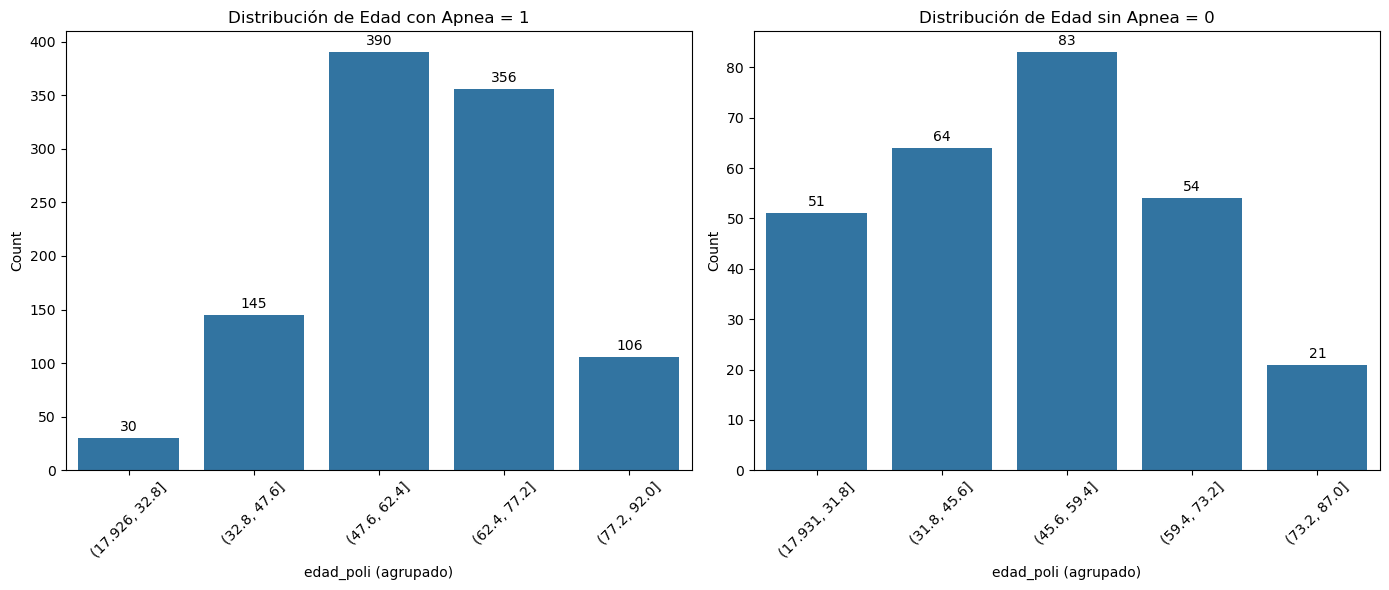

In [30]:
plot_comparative_graphs_with_bins(
    df=df_2,
    column_to_split="label_apnea",
    column_to_plot="edad_poli",
    bins=5,  # Número de intervalos
    title1="Distribución de Edad con Apnea = 1",
    title2="Distribución de Edad sin Apnea = 0"
)

In [27]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IdCliente            1300 non-null   int64  
 1   FecNacimiento        1300 non-null   object 
 2   Sexo                 1300 non-null   object 
 3   count                1300 non-null   int64  
 4   dic_datos_consulta   1300 non-null   object 
 5   cc                   1300 non-null   int64  
 6   Cantidad_Atenciones  1300 non-null   float64
 7   IAH                  1300 non-null   float64
 8   o2 / CPAP            15 non-null     float64
 9   fecha_poli           1300 non-null   object 
 10  label_apnea          1300 non-null   float64
 11  edad_poli            1300 non-null   float64
 12  secuencia_recortada  1300 non-null   object 
 13  vacios_poli          1300 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 142.3+ KB


/tmp/ipykernel_45626/2354860469.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['binned'] = pd.cut(df_1[column_to_plot], bins=bins)
/tmp/ipykernel_45626/2354860469.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['binned'] = pd.cut(df_2[column_to_plot], bins=bins)


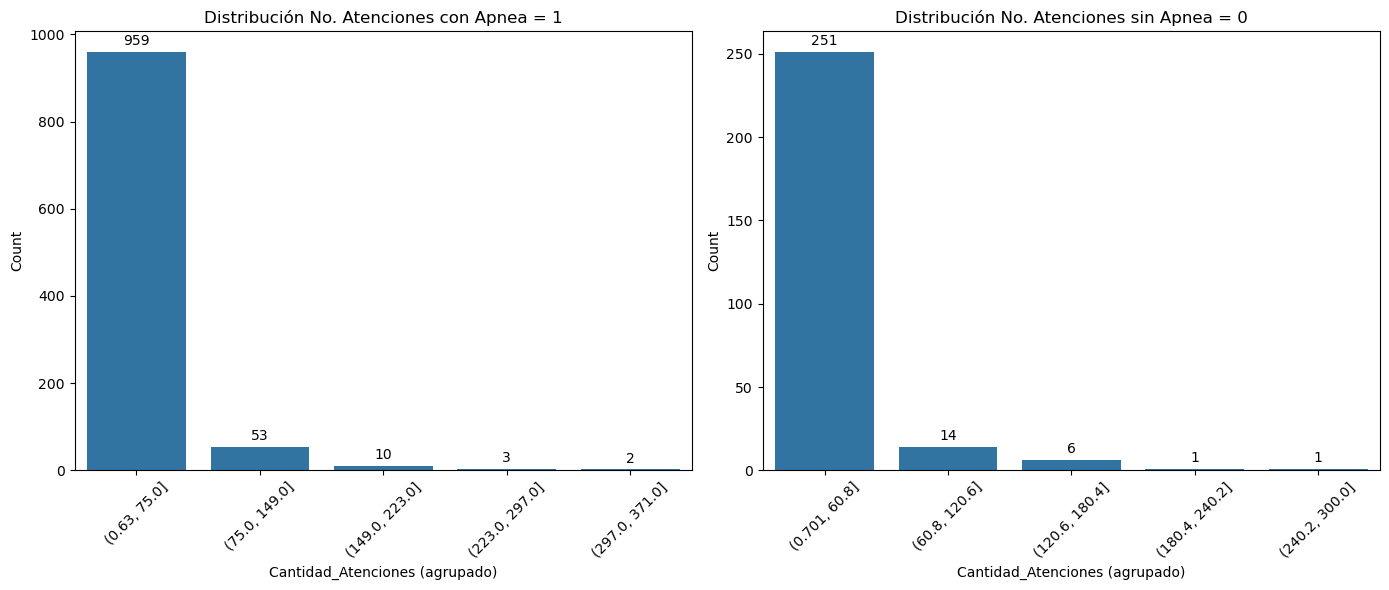

In [29]:
plot_comparative_graphs_with_bins(
    df=df_2,
    column_to_split="label_apnea",
    column_to_plot="Cantidad_Atenciones",
    bins=5,  # Número de intervalos
    title1="Distribución No. Atenciones con Apnea = 1",
    title2="Distribución No. Atenciones sin Apnea = 0"
)